In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.corpus.reader.wordnet import NOUN
from nltk.corpus import wordnet

from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

nltk.download('stopwords')
STOP_WORDS = list(stopwords.words('english'))

import re

import sklearn
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/fake reviews dataset.csv'
dataframe = pd.read_csv(data_path)

In [ ]:
dataframe_copy = dataframe.copy()

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text_     40432 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
dataframe.isnull().sum()

,0
category,0
rating,0
label,0
text_,0


In [ ]:
dataframe.shape

(40432, 4)

In [ ]:
dataframe.label.value_counts()

,count
label,
CG,20216
OR,20216


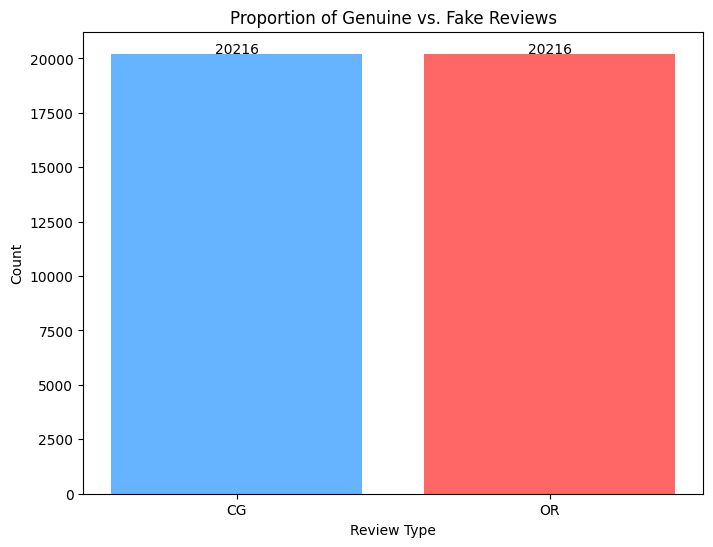

In [ ]:
import matplotlib.pyplot as plt

# Calculate the proportion of genuine vs. fake reviews
label_counts = dataframe['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

# Plot the proportion of genuine vs. fake reviews as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['#66b3ff', '#ff6666'])
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.title('Proportion of Genuine vs. Fake Reviews')

# Optional: Add value labels on top of the bars
for i, size in enumerate(sizes):
    plt.text(i, size + 5, str(size), ha='center')

plt.show()


<ipython-input-15-8f986ba92580>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)


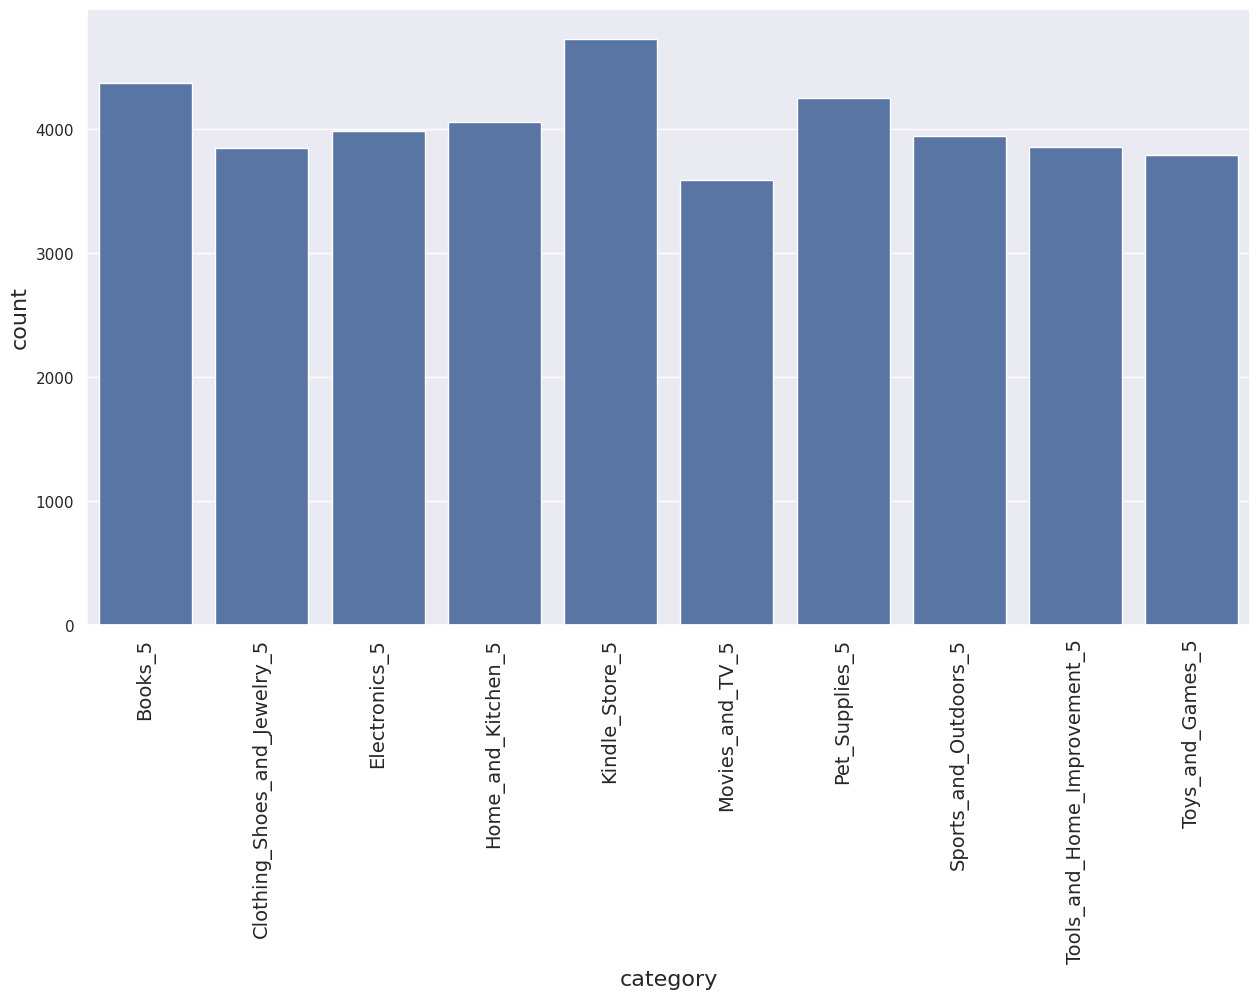

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'category' column is treated as a categorical type
dataframe['category'] = dataframe['category'].astype('category')

plt.figure(figsize=(15, 8))
sns.set_style("darkgrid")
ax = sns.countplot(x='category', data=dataframe)

# Set the x-tick labels with a larger font size and rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)

# Set the y-axis label font size (optional)
ax.set_ylabel('count', fontsize=16)

# Set the x-axis label font size (optional)
ax.set_xlabel('category', fontsize=16)

plt.show()



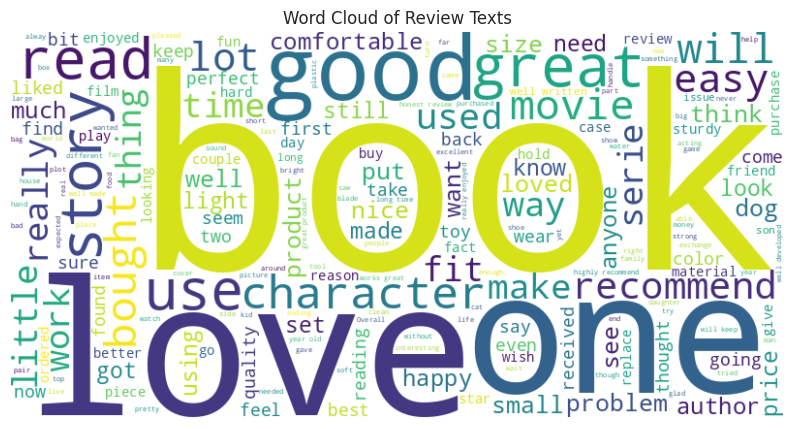

In [ ]:
Afrom wordcloud import WordCloud

# Combine all review texts into a single string
all_text = ' '.join(dataframe['text_'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()

In [ ]:
# Converting the text into lower case
dataframe["text_"] = [x.lower() for x in dataframe['text_']]

In [ ]:
# data["text_"] = [x for x in data['text_'] if x not in STOP_WORDS ]
# Converting text data into a list
list_text = dataframe.text_.astype(str).to_list()

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_list = []

for i, textwrap in enumerate(list_text):

  lemmatized_list1 = []
  LL1 = []
  for word in textwrap.split():
    lemmatized_list1.append(lemmatizer.lemmatize(word = word, pos = 'v'))

  for l in lemmatized_list1:
    LL1.append(lemmatizer.lemmatize(word = l))

  lemmatized_list.append(" ".join(LL1))

In [ ]:
stemmed_list = []
for id, textwrap in enumerate(lemmatized_list):

  stemmed_list1 = []
  for word in str(textwrap).lower().split():
    stemmed_list1.append(PorterStemmer().stem(word = word))
  stemmed_list.append(" ".join(stemmed_list1))

final_text = stemmed_list

In [ ]:
punctuations = """!\"#$%&'()*+/:;<=>?@[\]^_.`{|}~"""

final_list = []
for i, title in enumerate(final_text):
  html_list = ' '
  for word in title.split():
    word = re.sub("(<.*?>)","",word)

    if '-' not in word:
      word = re.sub("(\W|\d)"," ",word)
    else:
      final = ''
      for i in word:
        if i not in punctuations:
          final += i
        else:
          final += ''
      word = final

    #remove whitespace
    word = word.strip()

    html_list += word + " "
  final_list.append(html_list)


dataframe['CleanedText'] = final_list
dataframe['CleanedText'] = dataframe['CleanedText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))


In [ ]:
dataframe.head()

,category,rating,label,text_,CleanedText
0,Home_and_Kitchen_5,5,CG,"love this! well made, sturdy, and very comfor...",love well made sturdy veri comfortable love ve...
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. i...",love great upgrad original v mine coupl year
2,Home_and_Kitchen_5,5,CG,this pillow saved my back. i love the look and...,thi pillow save back love look feel thi pillow
3,Home_and_Kitchen_5,1,CG,"missing information on how to use it, but it i...",miss inform use great product price
4,Home_and_Kitchen_5,5,CG,very nice set. good quality. we have had the s...,veri nice set good quality set two month


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  ## BOW Model
from sklearn.feature_extraction.text import TfidfVectorizer
import re


In [ ]:
bow_vect=CountVectorizer()
bow=bow_vect.fit_transform(dataframe['text_'].values)

In [ ]:
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(dataframe['text_'].values)

In [ ]:
bow_vect = CountVectorizer()
bow = bow_vect.fit_transform(dataframe['CleanedText'].values)


In [ ]:
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(dataframe['CleanedText'].values)

In [ ]:
dataframe['CleanedText'].values[0]

'love well made sturdy veri comfortable love veri pretti'

In [ ]:
list_of_sent = [] * len(dataframe['CleanedText'])
for i in range(len(dataframe['CleanedText'])):
  list_of_sent.append(dataframe['CleanedText'][i].split())


In [ ]:
list_of_sent[1]

['love', 'great', 'upgrad', 'original', 'v', 'mine', 'coupl', 'year']

In [ ]:
import gensim
w2v_model = gensim.models.Word2Vec(list_of_sent, min_count=5, vector_size=50, workers=-1)

In [ ]:
# Get the list of words in the vocabulary
words = list(w2v_model.wv.index_to_key)
print(len(words))


11132


In [ ]:
def calc_avg_w2v(list_of_sent, w2v_model):
    '''This function takes in 2 parameters as follows:
       1. list_of_sent - This is the list of sentences/reviews for which sentence vetors are to be constructed
       2. w2v_model - This is the Word2Vec model which is trained on the working corpus - contains the word vectors

       Return Value:
       sent_vectors - This is a list of sentence/review vectors constructed by averaging the word vectors
    '''

    ## Initialize an empty list
    sent_vectors = []
    ## Consider one sentence/review at a time
    for sent in list_of_sent:
        ## Initialize sentence vector to 0
        sent_vec = np.zeros(50)
        ## Initialize count of words to 0
        cnt_words = 0
        ## Consider the words one by one
        for word in sent:
            try:
                ## Calculate the word vector using the W2V model
                vec = w2v_model.wv[word]
                ## Add the word vector to the sentence vector (This is the numerator)
                sent_vec += vec
                ## Sum all the word counts (This is the denominator)
                cnt_words += 1
            except:
                pass
        ## Divide the numerator by the denominator to get the sentence vector
        sent_vec /= cnt_words
        ## Add the sentence vector in the final list
        sent_vectors.append(sent_vec)
    ## return the list of all the sentence vectors
    return sent_vectors

In [ ]:
## Preparing the data to call the function

## Make sure "list_of_sent" is imported from the pickle file
w2v_model = gensim.models.Word2Vec(list_of_sent, min_count=5, vector_size=50, workers=-1)

In [ ]:
sent_vectors = calc_avg_w2v(list_of_sent, w2v_model)

<ipython-input-30-01988381b2b6>:30: RuntimeWarning: invalid value encountered in divide
  sent_vec /= cnt_words


In [ ]:
len(sent_vectors)

40432

In [ ]:
import pickle
with open('sent_vec_avg_w2v.pkl', 'wb') as pickle_file:
    pickle.dump(sent_vectors, pickle_file)

In [ ]:
with open('sent_vec_avg_w2v.pkl', 'rb') as pickle_file:
    sent_vectors = pickle.load( pickle_file)

In [ ]:
# Importing all the required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #For plotting graphs
import itertools
np.random.seed(32)

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import model_selection, naive_bayes, svm #Machine learning classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




In [ ]:
Y = dataframe["label"];
#X = data["text_"]
X = dataframe["CleanedText"]
X = np.array(X)

Y = Y.replace({'CG':True, 'OR':False})
Y

0         True
1         True
2         True
3         True
4         True
         ...  
40427    False
40428     True
40429    False
40430     True
40431    False
Name: label, Length: 40432, dtype: bool

In [ ]:
train_text, test_text, train_y, test_y = train_test_split(X,Y,test_size = 0.2)

In [ ]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y)
test_y = Encoder.fit_transform(test_y)

In [ ]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(dataframe["CleanedText"])
Train_X_Tfidf = Tfidf_vect.transform(train_text)
Test_X_Tfidf = Tfidf_vect.transform(test_text)

In [ ]:
    Train_X_Tfidf.shape

(32345, 36908)

In [ ]:
    train_y.shape

(32345,)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
models = []
accuracies = []

In [ ]:
# fitting the training dataset on the Naive Bayes(NB) classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,train_y)
# predicting the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Deriving accuracy from the model using accuracy_score function
nb_accuracy = accuracy_score(predictions_NB, test_y) * 100
print("Naive Bayes Accuracy Score -> ", nb_accuracy)


Naive Bayes Accuracy Score ->  85.03771485099543


In [ ]:
models.append('Naive Bayes')
accuracies.append(nb_accuracy)

In [ ]:
print(classification_report(test_y, predictions_NB))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      4024
           1       0.82      0.91      0.86      4063

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087



In [ ]:
cm_NB = confusion_matrix(test_y, predictions_NB)
cm_NB

array([[3198,  826],
       [ 384, 3679]])

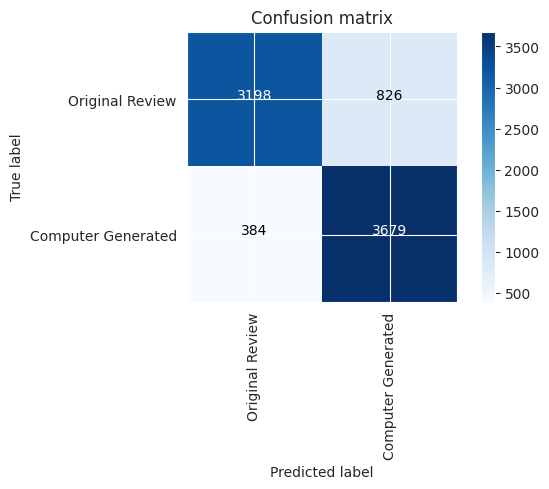

In [ ]:
#Plotting confusion matrix for Naive Bayes classifier
plot_confusion_matrix(cm_NB,
            classes = ['Original Review', 'Computer Generated'])
# The output below shows the colorful plot of the confusion matrix along with labels names

In [ ]:
# fitting the training dataset on the Support Vector Machine(SVM) classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,train_y)
# predicting the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Deriving accuracy from the model using accuracy_score function
svm_accuracy = accuracy_score(predictions_SVM, test_y) * 100
print("SVM Accuracy Score -> ", svm_accuracy)

SVM Accuracy Score ->  87.07802646222332


In [ ]:
models.append('SVM')
accuracies.append(svm_accuracy)

In [ ]:
# Printing the classification report for Support Vector Machine(SVM) classifier
print(classification_report(test_y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4024
           1       0.87      0.87      0.87      4063

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



In [ ]:
#Deriving Confusion matrix from SVM Classifier Predictions
cm_SVM = confusion_matrix(test_y, predictions_SVM)
cm_SVM

array([[3515,  509],
       [ 536, 3527]])

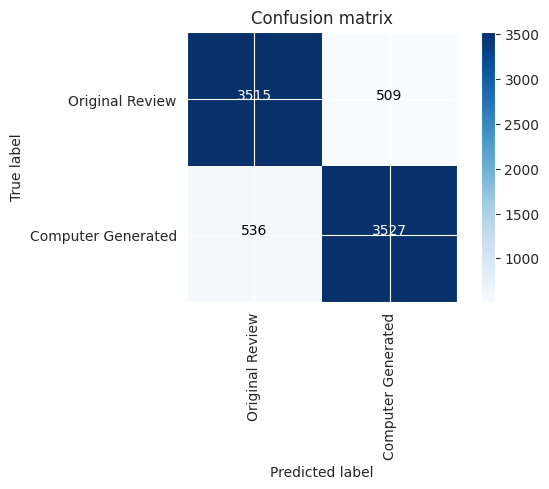

In [ ]:
#Plotting confusion matrix for Support Vector Machine(SVM) classifier
plot_confusion_matrix(cm_SVM,
            classes = ['Original Review', 'Computer Generated'])
# The output below shows the colorful plot of the confusion matrix along with labels names

In [ ]:
# fitting the training dataset on Random Forest classifier
Ran_forest = RandomForestClassifier()
Ran_forest.fit(Train_X_Tfidf,train_y)
# predicting the labels on validation dataset
predictions_rfc = Ran_forest.predict(Test_X_Tfidf)
# Deriving accuracy from the model using accuracy_score function
rf_accuracy = accuracy_score(predictions_rfc, test_y) * 100
print("Random Forest Accuracy Score -> ", rf_accuracy)

Random Forest Accuracy Score ->  85.69308767157166


In [ ]:
models.append('Random Forest')
accuracies.append(rf_accuracy)

In [ ]:
# Printing the classification report for Random Forest classifier
print(classification_report(test_y,predictions_rfc))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4024
           1       0.84      0.88      0.86      4063

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



In [ ]:
    #Deriving Confusion matrix from Random Forest Classifier Predictions
    cm_RFC = confusion_matrix(test_y, predictions_rfc)
    cm_RFC

array([[3353,  671],
       [ 486, 3577]])

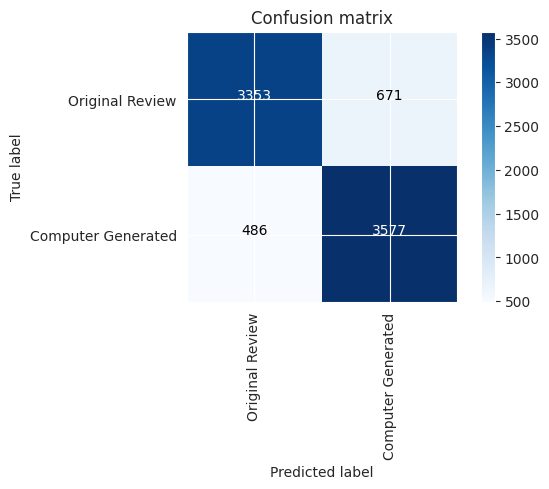

In [ ]:
#Plotting Confusion matrix for Random Forest Classifier
plot_confusion_matrix(cm_RFC,
            classes = ['Original Review', 'Computer Generated'])
# The output below shows the colorful plot of the confusion matrix along with labels names

In [ ]:
# Fitting the training dataset on Logistic Regression classifier
log_reg = LogisticRegression()
log_reg.fit(Train_X_Tfidf, train_y)
# Predicting the labels on validation dataset
predictions_lr = log_reg.predict(Test_X_Tfidf)
# Deriving accuracy from the model using accuracy_score function
accuracy_lr = accuracy_score(predictions_lr, test_y)* 100
print("Logistic Regression Accuracy Score -> ", accuracy_lr )

Logistic Regression Accuracy Score ->  87.32533696055398


In [ ]:
models.append('Logistic Regression')
accuracies.append(accuracy_lr)

In [ ]:
# Printing the classification report for Logistic Regression classifier
print(classification_report(test_y, predictions_lr))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4024
           1       0.89      0.85      0.87      4063

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



In [ ]:
# Deriving Confusion matrix from Logistic Regression Classifier Predictions
cm_lr = confusion_matrix(test_y, predictions_lr)
cm_lr

array([[3598,  426],
       [ 599, 3464]])

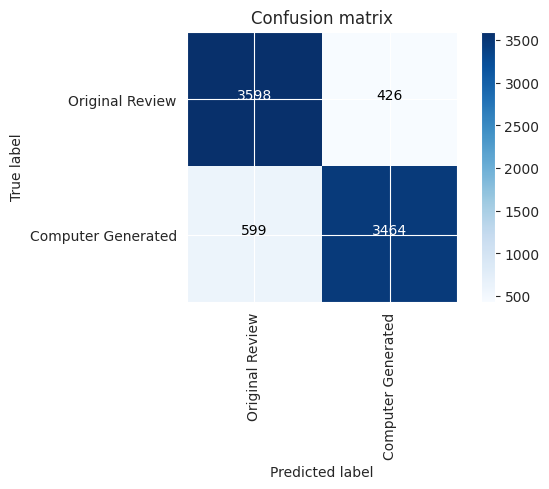

In [ ]:
#Plotting Confusion matrix for Logistic Regression
plot_confusion_matrix(cm_lr,
            classes = ['Original Review', 'Computer Generated'])
# The output below shows the colorful plot of the confusion matrix along with labels names

In [ ]:
# Fitting the training dataset on Decision Tree classifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(Train_X_Tfidf, train_y)
# Predicting the labels on validation dataset
predictions_dt = dec_tree.predict(Test_X_Tfidf)
# Deriving accuracy from the model using accuracy_score function
accuracy_dt = accuracy_score(predictions_dt, test_y) * 100
print("Decision Tree Accuracy Score -> ", accuracy_dt)

Decision Tree Accuracy Score ->  74.87325336960554


In [ ]:
models.append('Decision Tree')
accuracies.append(accuracy_dt )

In [ ]:
# Printing the classification report for Decision Tree classifier
print(classification_report(test_y, predictions_dt))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      4024
           1       0.75      0.75      0.75      4063

    accuracy                           0.75      8087
   macro avg       0.75      0.75      0.75      8087
weighted avg       0.75      0.75      0.75      8087



In [ ]:
# Deriving Confusion matrix from Decision Tree classifier
cm_dt = confusion_matrix(test_y, predictions_dt)
cm_dt

array([[3024, 1000],
       [1032, 3031]])

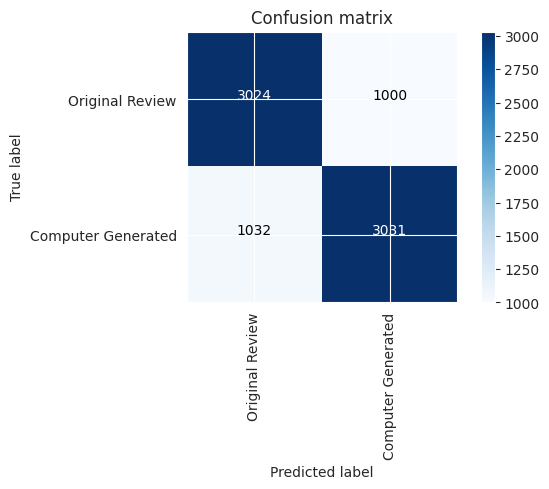

In [ ]:
#Plotting Confusion matrix for Decision Tree classifier
plot_confusion_matrix(cm_dt,
            classes = ['Original Review', 'Computer Generated'])
# The output below shows the colorful plot of the confusion matrix along with labels names

In [ ]:
# Fitting the training dataset on K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Train_X_Tfidf, train_y)
# Predicting the labels on validation dataset
predictions_knn = knn.predict(Test_X_Tfidf)
# Deriving accuracy from the model using accuracy_score function
accuracy_knn = accuracy_score(predictions_knn, test_y) * 100
print("K Nearest Neighbor ->", accuracy_knn)

K Nearest Neighbor -> 64.48621243971807


In [ ]:
models.append('K Nearest Neighbor')
accuracies.append(accuracy_knn )

In [ ]:
# Printing the classification report for  K Nearest Neighbor
print(classification_report(test_y, predictions_knn))

              precision    recall  f1-score   support

           0       0.80      0.39      0.52      4024
           1       0.60      0.90      0.72      4063

    accuracy                           0.64      8087
   macro avg       0.70      0.64      0.62      8087
weighted avg       0.70      0.64      0.62      8087



In [ ]:
# Deriving Confusion matrix from  K Nearest Neighbor
cm_knn = confusion_matrix(test_y, predictions_knn)
cm_knn

array([[1552, 2472],
       [ 400, 3663]])

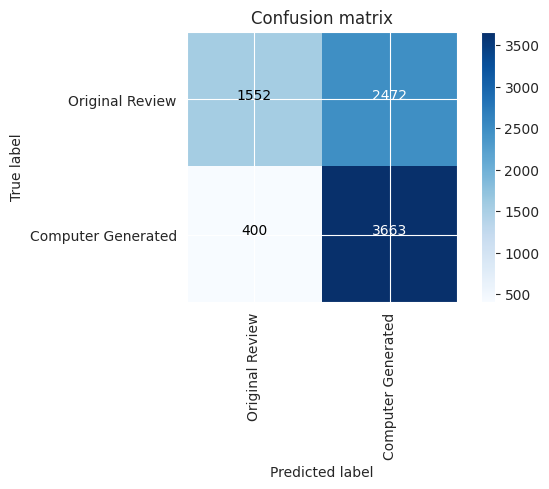

In [ ]:
#Plotting Confusion matrix for  K Nearest Neighbor
plot_confusion_matrix(cm_knn, classes = ['Original Review', 'Computer Generated'])
# The output below shows the colorful plot of the confusion matrix along with labels names

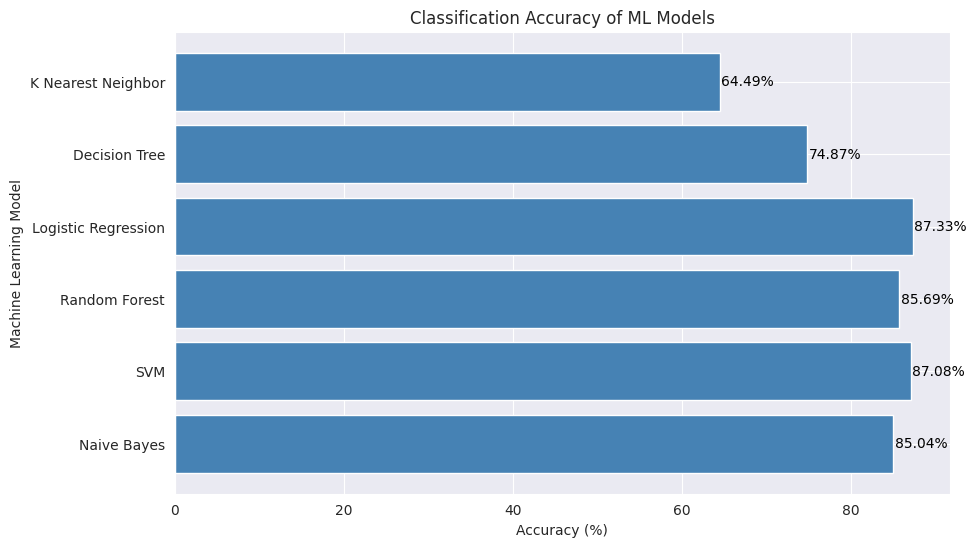

In [ ]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='steelblue')

# Adding titles and labels
plt.title('Classification Accuracy of ML Models')
plt.xlabel('Accuracy (%)')
plt.ylabel('Machine Learning Model')

# Adding accuracy values next to bars
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.2, i, f'{acc:.2f}%', va='center', color='black')

# Display the plot
plt.show()